<a href="https://colab.research.google.com/github/JustynaGoc/machine-learning-bootcamp/blob/main/4_Dzielenie_zbiorow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [2]:
np.random.seed(42)
np.set_printoptions(edgeitems = 30, linewidth=100000, formatter = dict(float = lambda x: f'{x: .2f}'))
sns.set()
sklearn.__version__

'1.6.1'

Załadowanie danych

In [3]:
from sklearn.datasets import load_iris

In [4]:
raw_data = load_iris()
raw_data_copy = raw_data.copy()

In [5]:
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(raw_data_copy['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
data = raw_data_copy["data"]
target = raw_data_copy["target"]


In [8]:
data_all = np.c_[data,target]
df= pd.DataFrame(data_all, columns = raw_data.feature_names  + ["target"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [10]:
df.describe().T.apply(lambda x: round(x,2))

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
target,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


In [11]:
df.target.value_counts()

,count
target,
0.0,50
1.0,50
2.0,50


<Axes: ylabel='count'>

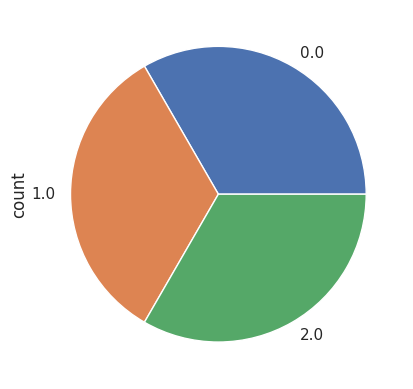

In [12]:
df.target.value_counts().plot(kind = "pie")

In [13]:
data = df.copy()
target = data.pop("target")
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state =42)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [17]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [18]:
test_ratio = len(x_test)/len(data)
test_ratio

0.25333333333333335

In [19]:
y_test.value_counts(), y_train.value_counts()

(target
 0.0    15
 2.0    12
 1.0    11
 Name: count, dtype: int64,
 target
 1.0    39
 2.0    38
 0.0    35
 Name: count, dtype: int64)

In [20]:
y_train.value_counts()

,count
target,
1.0,39
2.0,38
0.0,35


In [21]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state =42)

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [23]:
y_test.value_counts(),y_train.value_counts()


(target
 0.0    19
 1.0    13
 2.0    13
 Name: count, dtype: int64,
 target
 1.0    37
 2.0    37
 0.0    31
 Name: count, dtype: int64)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.9, random_state =42)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((135, 4), (15, 4), (135,), (15,))

In [26]:
y_test.value_counts(),y_train.value_counts()

(target
 1.0    6
 0.0    6
 2.0    3
 Name: count, dtype: int64,
 target
 2.0    47
 1.0    44
 0.0    44
 Name: count, dtype: int64)

In [27]:
#rowny podzial zmiennej docelowej

In [28]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, stratify=target, random_state =42)

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((135, 4), (15, 4), (135,), (15,))

In [30]:
y_test.value_counts(),y_train.value_counts()

(target
 1.0    5
 2.0    5
 0.0    5
 Name: count, dtype: int64,
 target
 0.0    45
 2.0    45
 1.0    45
 Name: count, dtype: int64)

Podzial danych na podstawie breast cancer data

In [31]:
from sklearn.datasets import load_breast_cancer


In [32]:
raw_data =load_breast_cancer()
raw_data_copy  = raw_data.copy()

In [33]:
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [34]:
data = raw_data_copy["data"]
target=  raw_data_copy["target"]

In [39]:
data_all = np.c_[data,target]
data_all
df= pd.DataFrame(data_all, columns = list(raw_data["feature_names"]) + ["target"])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [40]:
df.target.value_counts()

,count
target,
1.0,357
0.0,212


<Axes: xlabel='target'>

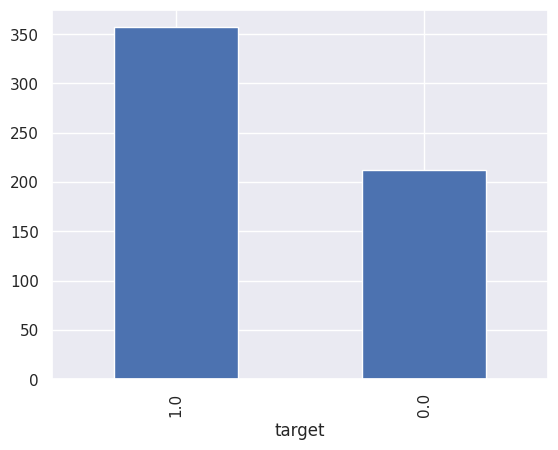

In [42]:
df.target.value_counts().plot(kind = "bar")

In [43]:
data = df.copy()
target = data.pop("target")

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# stratify=target
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state =40, test_size=0.25)

In [46]:
y_test.value_counts(),y_train.value_counts()

(target
 1.0    98
 0.0    45
 Name: count, dtype: int64,
 target
 1.0    259
 0.0    167
 Name: count, dtype: int64)

In [47]:
y_test.value_counts()/ len(y_test),y_train.value_counts()/len(y_train)

(target
 1.0    0.685315
 0.0    0.314685
 Name: count, dtype: float64,
 target
 1.0    0.607981
 0.0    0.392019
 Name: count, dtype: float64)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state =40, test_size=0.25,stratify=target)
y_test.value_counts(),y_train.value_counts(), y_test.value_counts()/ len(y_test),y_train.value_counts()/len(y_train)

(target
 1.0    90
 0.0    53
 Name: count, dtype: int64,
 target
 1.0    267
 0.0    159
 Name: count, dtype: int64,
 target
 1.0    0.629371
 0.0    0.370629
 Name: count, dtype: float64,
 target
 1.0    0.626761
 0.0    0.373239
 Name: count, dtype: float64)